In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from State import State
from GenerateDemandMonthly import GenerateDemandMonthly
from GeneticAlgoState import GeneticAlgoState

In [4]:
genstate = GeneticAlgoState()
genstate.create_state([-1,0, 1, 1, 2, 2])

#print(-1 * genstate.GArun([58,69,41,52,49,52]))

def f(X):
    return -1 * genstate.GArun(X)

In [5]:
varbound=np.array([[40,90]]*6)



algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=6,variable_type='int',variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

__________________________________________________ 0.1% GA is running...

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\geneticalgorithm\geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


 The best solution found:                                                                           
 [79. 90. 57. 69. 50. 51.]

 Objective function:
 -150391.93333333332


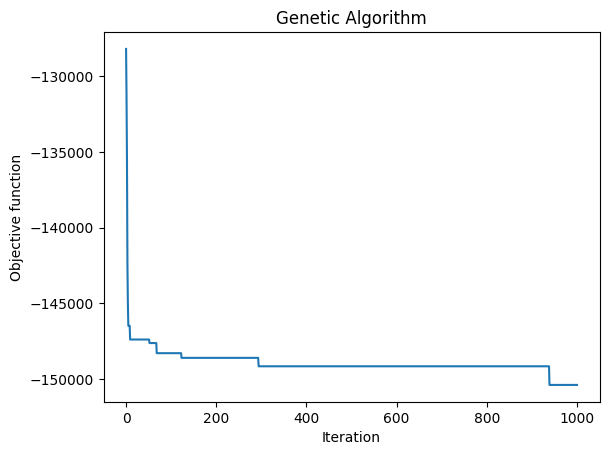

In [6]:
model.run()